In [1]:
import pandas as pd
import numpy as np
import requests
import pytesseract
from PIL import Image
from tqdm.auto import tqdm
import pickle as pkl

In [2]:
fp_df = pd.read_csv('data/Outdoor_Space_Floorplans_2024_07_22.csv')
fp_df.head()

,listing_id,original_url
0,35102230,http://corcjagmedia1.airpear.net/Floorplans/10...
1,35102229,http://corcjagmedia1.airpear.net/Floorplans/23...
2,35102072,https://photos.v3.mlsstratus.com/Live/photos/f...
3,35102123,https://www.compass.com/m/0/4ee121a7-9067-4b35...
4,35083898,https://photos.v3.mlsstratus.com/Live/photos/f...


In [3]:
x = requests.get(fp_df['original_url'][0])

In [4]:
x.status_code

200

In [5]:
x.text

'�PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x05\x0e\x00\x00\x03�\x08\x06\x00\x00\x00��c�\x00\x00\x00\x01sRGB\x00��\x1c�\x00\x00\x00\x04gAMA\x00\x00��\x0b�a\x05\x00\x00\x00\tpHYs\x00\x00\x0e�\x00\x00\x0e�\x01�o�d\x00\x00��IDATx^��\x07�u]U�����\x18_4Q�%\x1a,�&6��bM�-\x1a{�Ѩ��\x1eĮ؈`E#�\x1d�aI�HS@����&�\x06��\x08\x02_���\\g�{���k�9�yߗ�~��\x18��͵���}�s�g�u�g�{����\x7f�\x0f\'�?���x��ϑ]��\x7f�O�������g���_����>�v��\x1e��[�#�����\x1dΑ#����;\x13���\x19��\x7f��ߪ\'+�\x0f���p=c��?����z���\x7f��nы8�x��\x1f~����\n?�s?w=+<�\x11���\x15\x1e��Gު���G=�\x16\x19�Ux��\x1f}=Wx�c\x1es��*?��?\x7f�8v~�\x17~!�87ⱏ}�z�\x19�{��g�g<��O�*��/��u�x�/��/]O�}n�/��/_O��F<�\tO�E/�8�O|��t�9�IOz�p�\x1c��\'?�V}�;�)Oy�2O}�S���u��_��\x12O{��n�3~�W\x7f�V\x19���?���5V?��~������U��g,����׳�o��o\\�\x0e����y=/�~뷮������[��y�\x0e�|�3[<�YϺMx���}1�y�sn�s��ܴ��-�w~�wnՏ�F<�yϻ���x��?���x�\x0b^p����g���/�U���w\x7f�w������\x1bΑ\x1d~��\x7f�V=\x19��?��[d���\x7f������xы^t=c���\x17�x8Gv��?���Y��������9/y�Kn�{V��?��[北�����{����?��3q.n���?����8n�����

In [6]:
r = requests.get(fp_df['original_url'][0], stream=True)
if r.status_code == 200:
    r.raw.decode_content = True
    i = Image.open(r.raw)

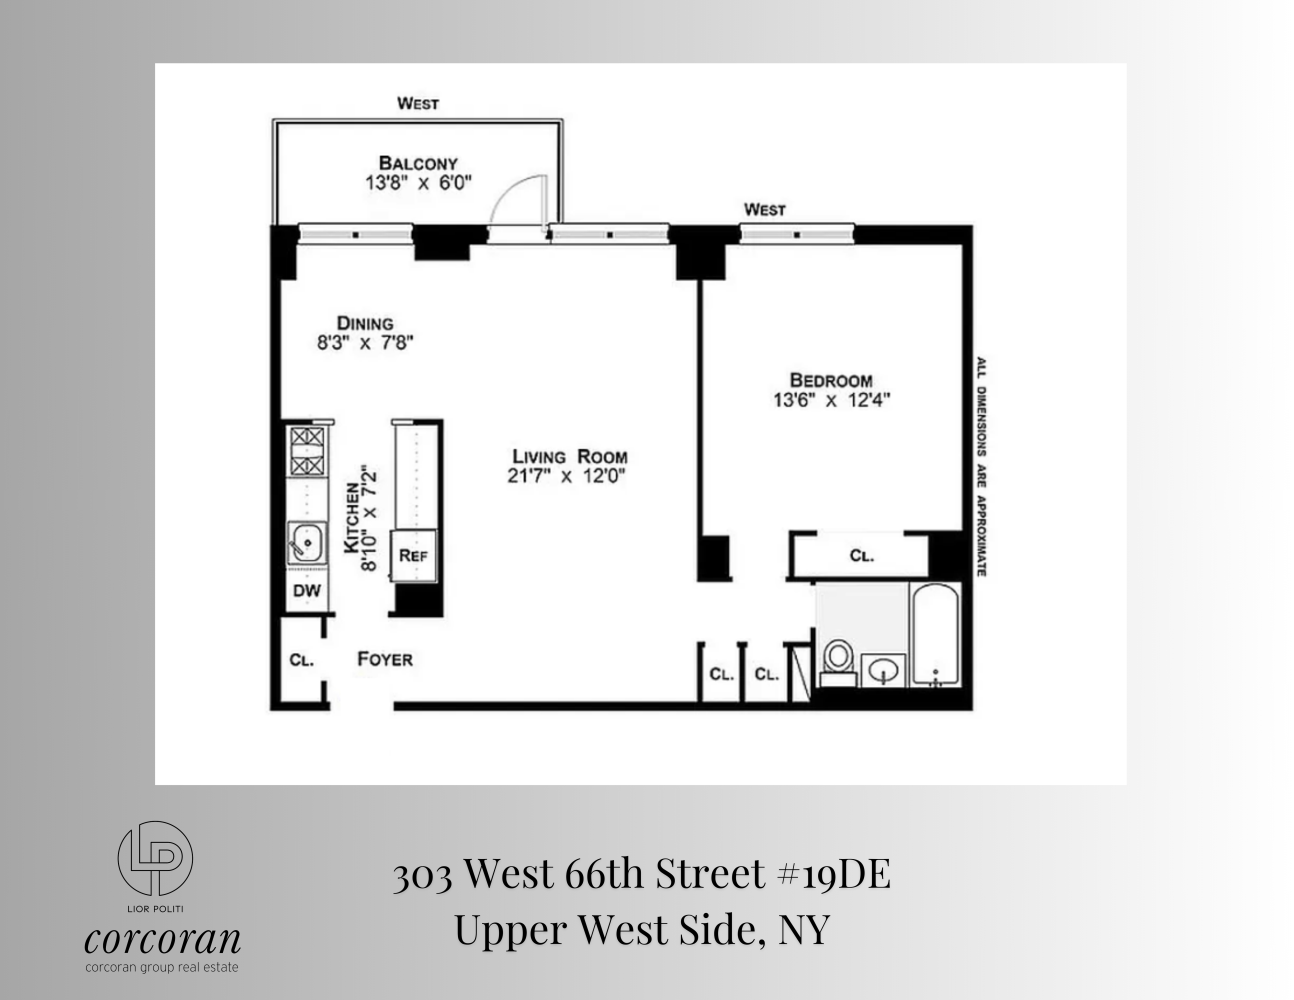

In [7]:
i

In [8]:
print(pytesseract.image_to_string(i))

21'°7" x 12'0"

West 66th Street #19DE
pper West Side, NY



In [9]:
print(pytesseract.image_to_osd(i))

Page number: 0
Orientation in degrees: 0
Rotate: 0
Orientation confidence: 2.84
Script: Latin
Script confidence: 5.00



In [10]:
i.size

(1294, 1000)

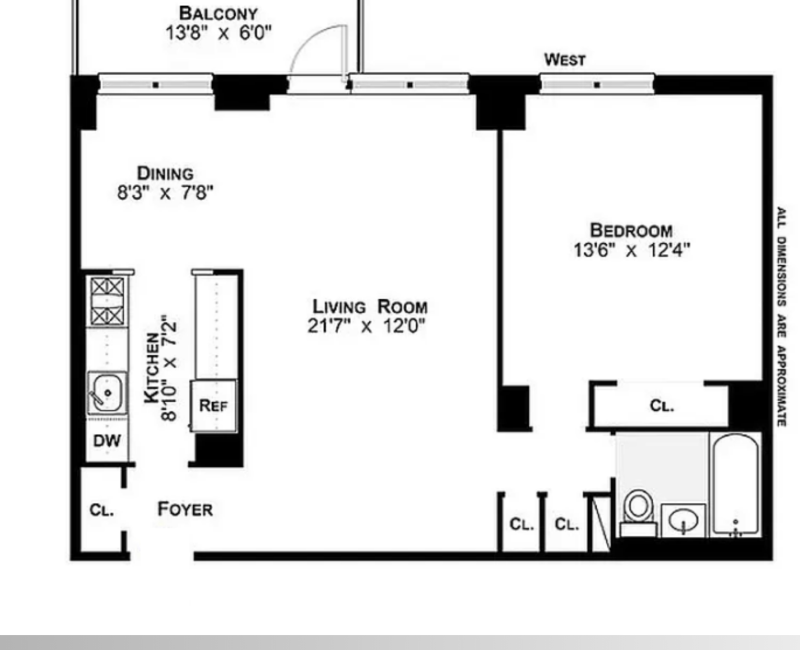

In [11]:
i.crop((200, 150, 1000, 800))

In [12]:
width, height = i.size

In [13]:
print(pytesseract.image_to_string(i.crop((200, 100, 1000, 800))))

West

BALCONY
13'8" x 60"

DINING

BEDROOM
13'6" x 12'4"

Living Room
21'7" x 120°

BLYWIXONddY BUY SNOISNAWIO TY




In [14]:
print(pytesseract.image_to_string(i.crop((width/10, height/10, width - width/10, height - height/10))))

West

BALCONY
13'8" x 6'0"

DINING
8'3" x 7'8"

BEDROOM
13'6" x 12'4"

Living Room
21°7" x 120"

BLYWIXONddY BUY SNOISNAWIO TY

ls) 303 West 66th Street #19DE



In [15]:
def check_string(s):
    return (('balcony' in s) or ('terrace' in s) or ('yard' in s) or ('garden' in s) or ('patio' in s))

def check_floor_plan(img: Image) -> str:
    if check_string(pytesseract.image_to_string(img).lower()):
        return True
    if check_string(pytesseract.image_to_string(img.rotate(90)).lower()):
        return True
    if check_string(pytesseract.image_to_string(img.rotate(180)).lower()):
        return True
    if check_string(pytesseract.image_to_string(img.rotate(270)).lower()):
        return True
    
    width, height = img.size
    img = img.crop((width/10, height/10, width - width/10, height - height/10))
    if check_string(pytesseract.image_to_string(img).lower()):
        return True
    if check_string(pytesseract.image_to_string(img.rotate(90)).lower()):
        return True
    if check_string(pytesseract.image_to_string(img.rotate(180)).lower()):
        return True
    if check_string(pytesseract.image_to_string(img.rotate(270)).lower()):
        return True
    
    return False

In [16]:
check_floor_plan(i)

True

In [17]:
fp_df = pd.concat([pd.read_csv('data/Outdoor_Space_Floorplans_0.csv'), pd.read_csv('data/Outdoor_Space_Floorplans_1.csv')])

In [18]:
fp_df

,listing_id,original_url
0,240,https://images.realty.mx/cd37b867bc72de7092be7...
1,279,http://mmsmh.gothamphotocompany.com/Media/Floo...
2,279,http://mmsmh.gothamphotocompany.com/Media/Floo...
3,279,http://mmsmh.gothamphotocompany.com/Media/Floo...
4,393,http://mmsmh.gothamphotocompany.com/Media/Floo...
...,...,...
50801,35102411,https://www.olr.com/Pictures/broker_floorplan/...
50802,35102615,https://www.compass.com/m/0/fb6e50ed-872d-49ab...
50803,35102616,https://mmsmedia.vht.com/Media/FloorPlan/DEGI/...
50804,35102723,https://adkastcdn.cachefly.net/adkast/image/xl...


In [19]:
try:
    with open('data/retdf.pkl', 'rb') as f:
        retdf = pkl.load(f)
    #retdf = pd.DataFrame(retdf)
    #retdf = retdf[retdf['public_or_private'] != 'no_floor_plan']
    #retdf = {'listing_id': list(retdf['listing_id'].values), 'public_or_private': list(retdf['public_or_private'].values)}
except:
    retdf = {'listing_id': [], 'public_or_private': []}
for index, row in tqdm(fp_df.iterrows(), total=len(fp_df)):
    if len(retdf['listing_id']) % 500 == 0:
        with open('data/retdf.pkl', 'wb') as f:
            pkl.dump(retdf, f)
    if index >= len(retdf['listing_id']):
        retdf['listing_id'].append(row['listing_id'])
        try:
            r = requests.get(row['original_url'], stream=True, timeout=5)
            if r.status_code == 200:
                r.raw.decode_content = True
                i = Image.open(r.raw)
                if check_floor_plan(i):
                    retdf['public_or_private'].append('private')
                else:
                    retdf['public_or_private'].append('public')
            else:
                retdf['public_or_private'].append('no_floor_plan')
        except:
            retdf['public_or_private'].append('no_floor_plan')

  0%|          | 0/150806 [00:00<?, ?it/s]

/Users/arnavmalhotra/anaconda3/envs/pw_3.12/lib/python3.12/site-packages/PIL/Image.py:3218: DecompressionBombWarning: Image size (121035600 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/Users/arnavmalhotra/anaconda3/envs/pw_3.12/lib/python3.12/site-packages/PIL/Image.py:3218: DecompressionBombWarning: Image size (120810474 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/Users/arnavmalhotra/anaconda3/envs/pw_3.12/lib/python3.12/site-packages/PIL/Image.py:3218: DecompressionBombWarning: Image size (121035600 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/Users/arnavmalhotra/anaconda3/envs/pw_3.12/lib/python3.12/site-packages/PIL/Image.py:3218: DecompressionBombWarning: Image size (169692369 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/Users/arnavmalhotra/anaconda3/envs/pw_3.12/

In [20]:
retdf = pd.DataFrame(retdf)
public_or_private_outdoor = {'listing_id': [], 'public_or_private': []}
for l_id in tqdm(retdf['listing_id'].unique(), total=len(retdf['listing_id'].unique())):
    public_or_private_outdoor['listing_id'].append(l_id)
    if 'private' in retdf[retdf['listing_id'] == l_id]['public_or_private'].values:
        public_or_private_outdoor['public_or_private'].append('private')
    else:
        public_or_private_outdoor['public_or_private'].append('public')


  0%|          | 0/57562 [00:00<?, ?it/s]

In [21]:
pd.DataFrame(public_or_private_outdoor)

,listing_id,public_or_private
0,279,private
1,393,public
2,441,private
3,560,public
4,567,public
...,...,...
57557,3751024,public
57558,3751025,private
57559,3751036,private
57560,3751065,private


In [26]:
pd.DataFrame(public_or_private_outdoor).to_csv('data/ocr_results.csv', index=False)

In [23]:
len(retdf)

100000

In [24]:
fp_df[fp_df['listing_id'] == 35101681]['original_url'].values

array(['https://photos.v3.mlsstratus.com/Live/photos/full/10/302/3567302_10.jpg'],
      dtype=object)

In [25]:
# TODO: check for grid pattern or thick line and thin line to indicate balcony (probably too much effort)